In [63]:
import pandas as pd
import statistics

In [67]:
data = pd.read_csv('desafio1.csv', sep = ',')

In [68]:
data.drop(columns=['id', 'sobrenome'], inplace = True)

In [69]:
data.columns

Index(['RowNumber', 'pontuacao_credito', 'estado_residencia', 'genero',
       'idade', 'nivel_estabilidade', 'saldo_conta', 'numero_produtos',
       'possui_cartao_de_credito', 'membro_ativo'],
      dtype='object')

In [70]:
data.set_index('RowNumber', inplace = True)
df= data[['pontuacao_credito', 'estado_residencia']]

In [42]:
lista = data['estado_residencia'].unique()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 2 columns):
pontuacao_credito    7000 non-null int64
estado_residencia    7000 non-null object
dtypes: int64(1), object(1)
memory usage: 164.1+ KB


In [84]:
moda = statistics.mode(list(df[df['estado_residencia'] == 'PR']['pontuacao_credito']))


int

In [103]:
dct = {}
for x in lista:
    df1 = df[df['estado_residencia']== x]
    moda = statistics.mode(list(df['pontuacao_credito']))
    mediana = df1['pontuacao_credito'].median()
    media = df1['pontuacao_credito'].mean()
    desvio_padrao = df1['pontuacao_credito'].std()
    temp = {x : {"moda": moda, "mediana": mediana, "media": media, "desvio_padrao": desvio_padrao}}
    dct.update(temp) 

In [43]:
{"SC": {"moda": 0.0, "mediana": 0.0, "media": 0.0, "desvio_padrao": 0.0}, "RS": {"moda": 0.0, "mediana": 0.0, "media": 0.0, "desvio_padrao": 0.0}

In [92]:
a = df[df['estado_residencia'] == 'RS']['pontuacao_credito']
b= df[df['estado_residencia'] == 'SC']['pontuacao_credito']
c = df[df['estado_residencia'] == 'PR']['pontuacao_credito']

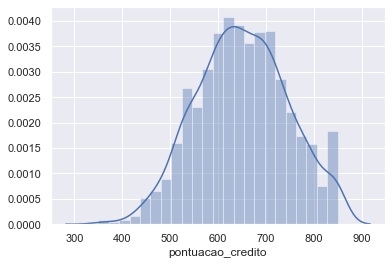

In [94]:
import seaborn as sns
sns.set();
sns.distplot(a)

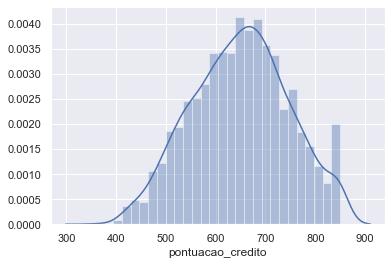

In [95]:
sns.set();
sns.distplot(b)

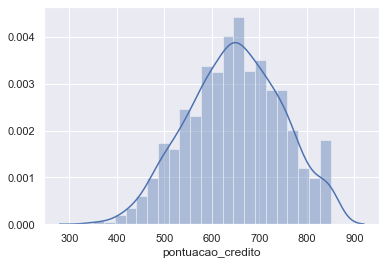

In [96]:
sns.set();
sns.distplot(c)

In [104]:
dct

{'SC': {'moda': 850,
  'mediana': 653.0,
  'media': 649.5376527422563,
  'desvio_padrao': 97.23349279343306},
 'RS': {'moda': 850,
  'mediana': 650.0,
  'media': 651.1051428571428,
  'desvio_padrao': 95.1365984138357},
 'PR': {'moda': 850,
  'mediana': 650.0,
  'media': 648.9612940496822,
  'desvio_padrao': 98.60718591309772}}

In [97]:
import json
app_json = json.dumps(dct)

In [98]:
app_json

'{"SC": {"moda": 850, "mediana": 653.0, "media": 649.5, "desvio_padrao": 97.2}, "RS": {"moda": 850, "mediana": 650.0, "media": 651.1, "desvio_padrao": 95.1}, "PR": {"moda": 850, "mediana": 650.0, "media": 649.0, "desvio_padrao": 98.6}}'

In [105]:
with open('submission.json', 'w') as json_file:
  json.dump(dct, json_file)